Context
This dataset contains tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. There are over half a million measurements total!

Content
This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

Acknowledgement
This dataset is part of the UCI Machine Learning Repository, and the original source can be found here. The original database owners are Jock A. Blackard, Dr. Denis J. Dean, and Dr. Charles W. Anderson of the Remote Sensing and GIS Program at Colorado State University.

Objectif : Prédire le type de couverture du sol en fonction de données environnementales.
Nombre d’exemples : 581 012
Nombre de classes : 7 (différents types de couvertures du sol)
Features :
Numériques : altitude, pente, distance aux plans d’eau, etc. (10 features).
One-hot encodées : types de sols et zones sauvages (44 features).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [11]:
url = "/content/drive/Othercomputers/Mon ordinateur portable/Data Science/CovTypeForest/covtype[1].csv"
df = pd.read_csv(url)
df.head()

# Note the the categorical variables are already one hot encoded

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [12]:
# check null values
df.isnull().sum() # none

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [13]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [23]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [50]:
import seaborn as sns
# check type
for var in df.columns:
  print(var,(df[var].dtype))
# all int


Elevation int64
Aspect int64
Slope int64
Horizontal_Distance_To_Hydrology int64
Vertical_Distance_To_Hydrology int64
Horizontal_Distance_To_Roadways int64
Hillshade_9am int64
Hillshade_Noon int64
Hillshade_3pm int64
Horizontal_Distance_To_Fire_Points int64
Wilderness_Area1 int64
Wilderness_Area2 int64
Wilderness_Area3 int64
Wilderness_Area4 int64
Soil_Type1 int64
Soil_Type2 int64
Soil_Type3 int64
Soil_Type4 int64
Soil_Type5 int64
Soil_Type6 int64
Soil_Type7 int64
Soil_Type8 int64
Soil_Type9 int64
Soil_Type10 int64
Soil_Type11 int64
Soil_Type12 int64
Soil_Type13 int64
Soil_Type14 int64
Soil_Type15 int64
Soil_Type16 int64
Soil_Type17 int64
Soil_Type18 int64
Soil_Type19 int64
Soil_Type20 int64
Soil_Type21 int64
Soil_Type22 int64
Soil_Type23 int64
Soil_Type24 int64
Soil_Type25 int64
Soil_Type26 int64
Soil_Type27 int64
Soil_Type28 int64
Soil_Type29 int64
Soil_Type30 int64
Soil_Type31 int64
Soil_Type32 int64
Soil_Type33 int64
Soil_Type34 int64
Soil_Type35 int64
Soil_Type36 int64
Soil_Type37 

In [35]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

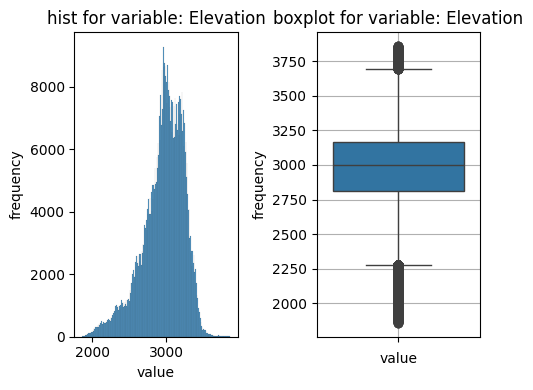

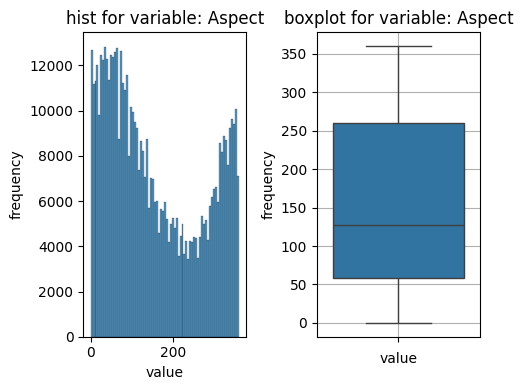

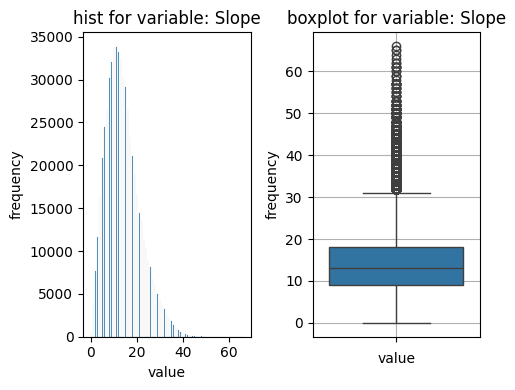

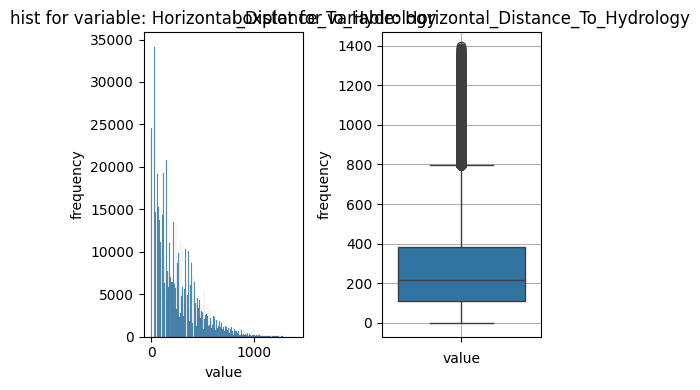

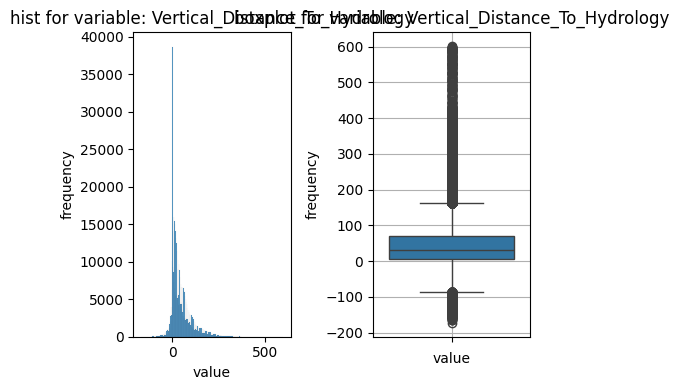

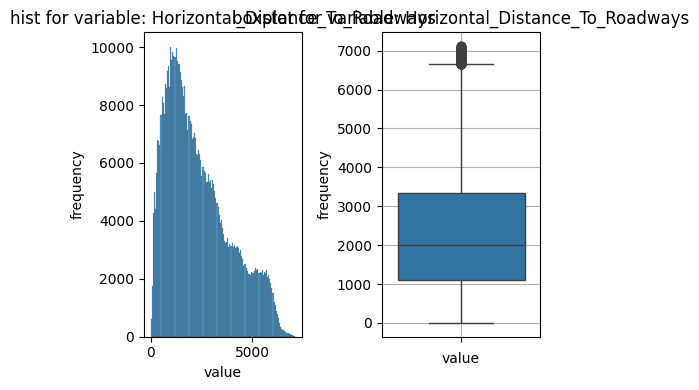

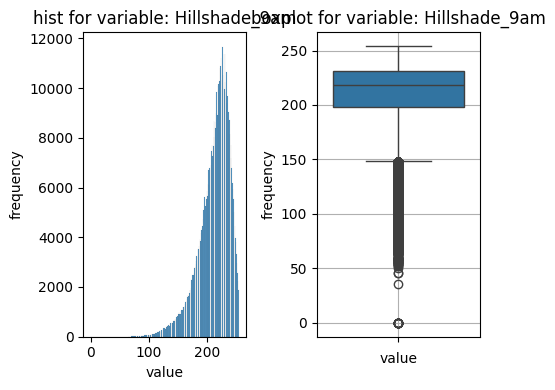

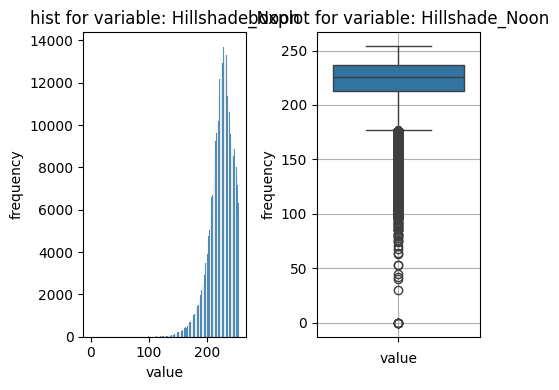

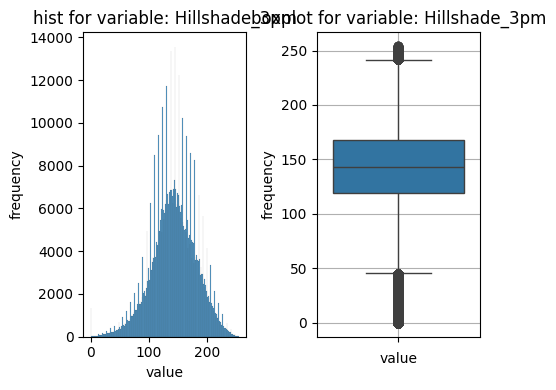

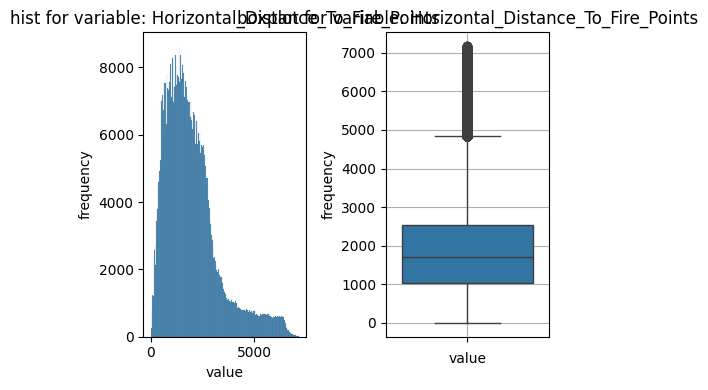

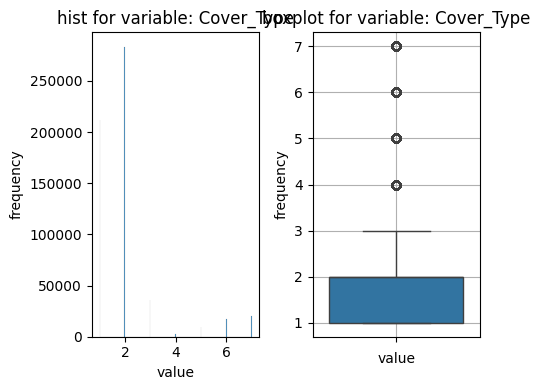

In [36]:
var_quant = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points','Cover_Type']

for var in var_quant:
    plt.figure(figsize = (5,4))
    plt.subplot(1,2,1)
    sns.histplot(df[var])
    plt.title("hist for variable: " + var)
    plt.xlabel("value")
    plt.ylabel("frequency")
    plt.subplot(1,2,2)
    sns.boxplot(df[var])
    plt.title("boxplot for variable: " + var)
    plt.xlabel("value")
    plt.ylabel("frequency")
    plt.tight_layout()
    plt.grid()


In [30]:
plt.figure(figsize=(10,8))
sns.pairplot(df[var_quant])

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

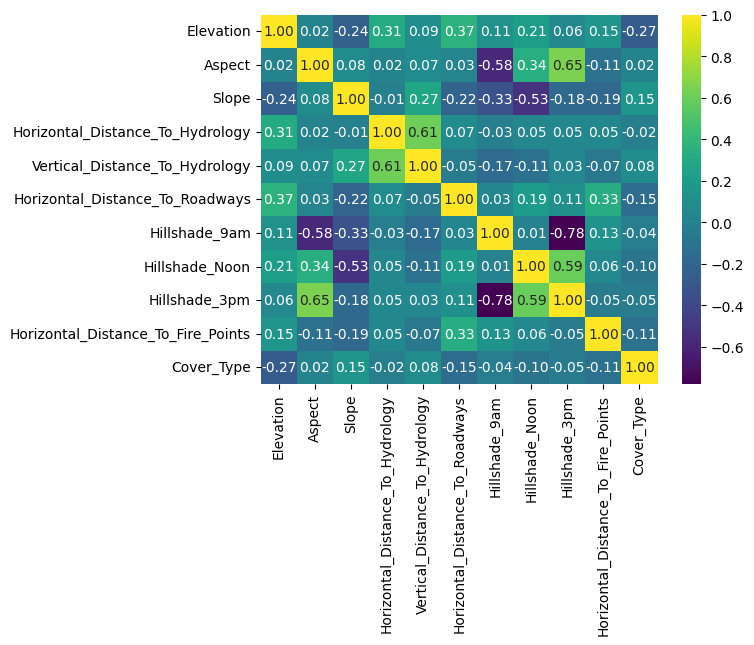

In [39]:
cor_mat = df[var_quant].corr()
sns.heatmap(cor_mat, annot = True, cmap='viridis', fmt='.2f')

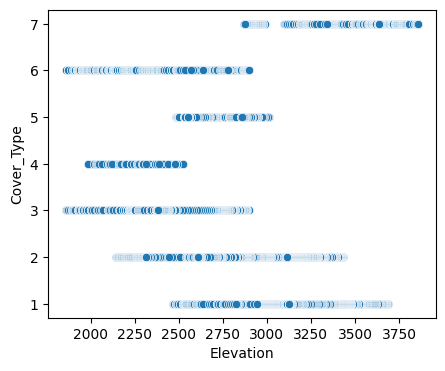

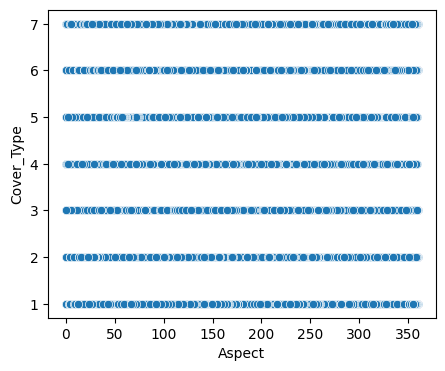

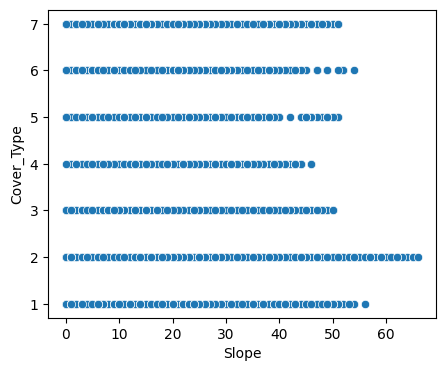

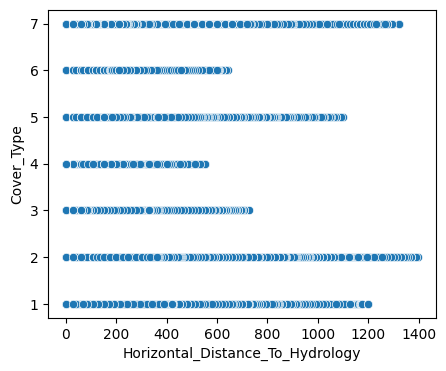

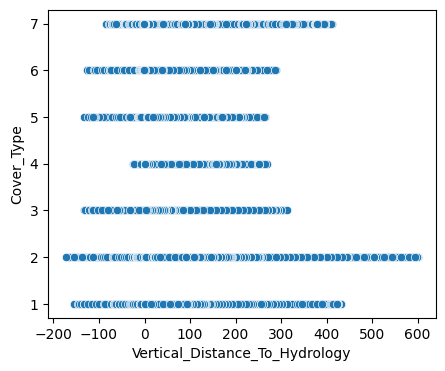

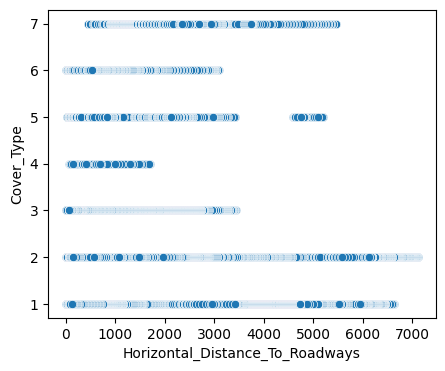

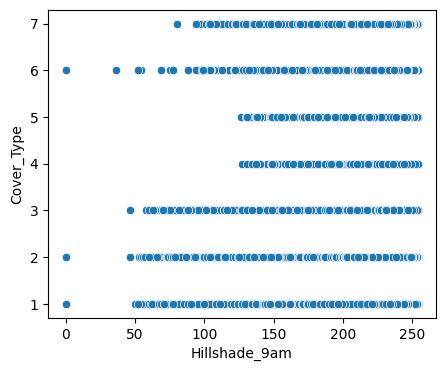

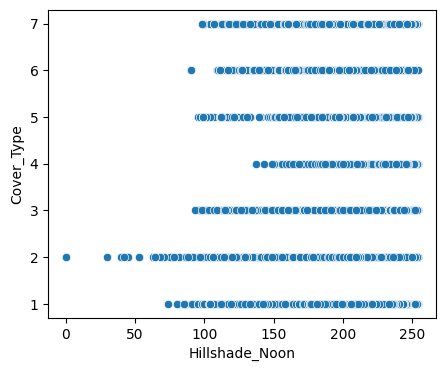

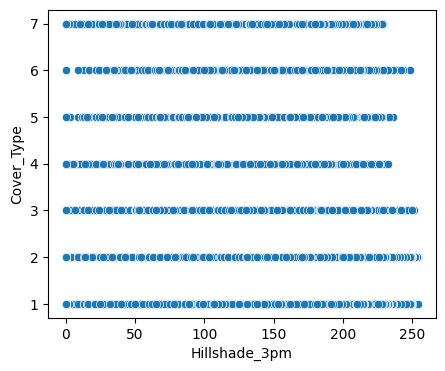

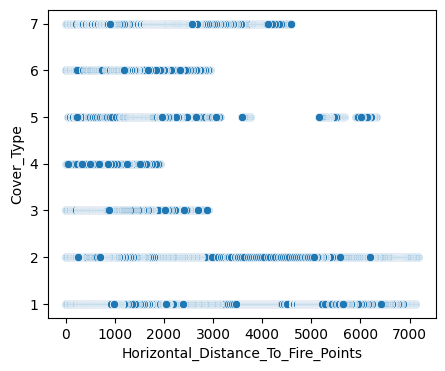

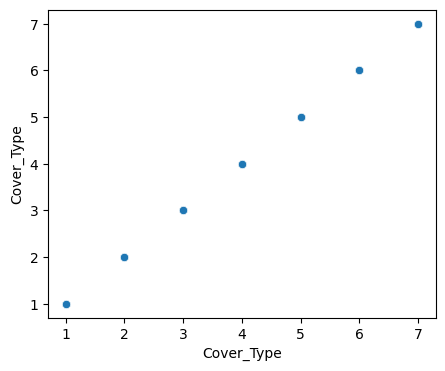

In [41]:
for var in df[var_quant]:
  plt.figure(figsize= (5,4))
  sns.scatterplot(y= df["Cover_Type"], x = df[var])



Dans PyTorch, la couche nn.Conv1d attend des données en 3D sous la forme :
(batch_size, in_channels, sequence_length)

Dans notre cas :
batch_size : Nombre d'échantillons par batch (ex : 64).

in_channels : Nombre de canaux d'entrée (1 pour des données tabulaires).

sequence_length : Nombre de features (54 pour Forest Cover Type).

Par défaut, nos données sont sous forme de torch.Tensor(batch_size, sequence_length).

Or, Conv1d s'attend à un tenseur 3D :
👉 On ajoute donc un canal (in_channels = 1) avec .unsqueeze(1).

In [84]:
from torch.utils.data import DataLoader, TensorDataset

#So we've done the exploratory part
# Now let's build the pytorch model

# target / features
df_features = df.drop(columns = ["Cover_Type"])
df_target = df["Cover_Type"]
df_target

# Split
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.2)
X_test


# Normalize
normalizer = StandardScaler()

X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.transform(X_test)
X_train_normalized

# np.array
y_train_normalized = np.array(y_train-1) # !!!! IndexError: Target 7 is out of bounds. (les labels allaient de 1 à 7 et mes sorties du modele de 0 à 6)
y_test_normalized = np.array(y_test-1)

# to tensor
X_train_tensor = torch.tensor(X_train_normalized, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test_normalized, dtype = torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train_normalized, dtype = torch.long)
y_test_tensor = torch.tensor(y_test_normalized, dtype = torch.long)
#X_train_tensor.shape
# without unsqueeze(1) => torch.Size([464809, 54])
# with => torch.Size([464809, 1, 54]) which is the right shape

# Dataloader
batch_size = 64
train_data = TensorDataset(X_train_tensor, y_train_tensor)
test_data = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_data, batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_data, batch_size = batch_size, shuffle = False)

[1 0 1 ... 1 0 0]


**CNN building details**

self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1)

self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)

Les convolutions 1D sont utilisées ici au lieu des couches Linear() des MLPs.

Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1):
Applique 32 filtres de taille 3 sur l’entrée.

in_channels=1 signifie que chaque feature est traitée comme une seule série temporelle.

padding=1 permet de conserver la taille d’origine après la convolution.

Conv1d(32, 64, kernel_size=3, padding=1):
Applique 64 filtres à la sortie de la première couche.

📌 Normalisation Batch (BatchNorm1d)

self.bn1 = nn.BatchNorm1d(32)

self.bn2 = nn.BatchNorm1d(64)

La BatchNorm normalise l'activation des convolutions pour accélérer l'entraînement et stabiliser le réseau.

Cela aide à éviter le vanishing/exploding gradient.

📌 MaxPooling (Réduction de taille)

self.pool = nn.MaxPool1d(kernel_size=2, stride=2)

Réduit la dimension des features en divisant par 2.

Permet de garder les informations importantes tout en réduisant la complexité du modèle.

📌 Couches Fully Connected (FC)
self.fc1 = nn.Linear((input_size // 2) * 64, 128)

self.fc2 = nn.Linear(128, num_classes)

fc1: Transforme les features extraits par les convolutions en 128 neurones.

fc2: Produit la sortie finale avec num_classes neurones.


**Comprendre in_channels=1 dans un CNN 1D?**

Un CNN 1D traite des données sous la forme d'un tableau 3D de taille :

(batch_size, in_channels, sequence_length)
batch_size : le nombre d’exemples dans un batch.

in_channels : le nombre de canaux (similaire aux couleurs en CNN 2D).

sequence_length : la longueur de la séquence (le nombre de features dans ce cas)

Comment ça fonctionne avec des données tabulaires ?

Si on a un dataset tabulaire où chaque exemple est un vecteur de taille input_size (ex: 54 colonnes), un MLP classique prendrait directement input_size features comme une entrée.

Avec un CNN 1D :

On représente chaque exemple comme une séquence de valeurs (une sorte de "série temporelle" avec une seule dimension).

Comme il n’y a pas plusieurs canaux (comme en images RGB où in_channels=3 pour [R, G, B]), on met in_channels=1.

👉 En résumé : chaque exemple est vu comme une séquence de input_size éléments ayant un seul canal.

🔍 Exemple Concret
Si X_train a une forme (1000, 54), ce qui signifie :

1000 exemples.
54 variables (features).
Un MLP classique prendrait l’entrée sous cette forme (batch_size, input_size) = (1000, 54).

Mais un CNN 1D attend une forme (batch_size, in_channels, sequence_length), donc il faut ajouter une dimension :


X_train_cnn = X_train.unsqueeze(1)  # Devient (1000, 1, 54)

Ainsi, chaque exemple est vu comme une séquence de 54 valeurs sur 1 seul canal.

🔄 Comment la convolution 1D traite ces données ?

Prenons la première couche :

self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1)

Chaque filtre apprend des relations locales entre trois colonnes voisines (kernel_size=3).

Cela permet au modèle de détecter des motifs entre les features.
Par exemple, si ton dataset contient :

Élévation
Pente
Distance à l'eau 👉 Un filtre pourrait apprendre une combinaison locale de ces trois variables.


In [75]:
# model building

class convolutiveNN(nn.Module):
  def __init__(self, input_size, output_size):
    super(convolutiveNN,self).__init__()
    self.conv1 = nn.Conv1d(in_channels=1, out_channels=32, kernel_size=3, padding=1) #Applique 32 filtres de taille 3 sur l’entrée. padding=1 permet de conserver la taille d’origine après la convolution. n_channels=1 signifie que chaque feature est traitée comme une seule série temporelle.
#sequence_length correspond à input_size mais il n'est pas utilisé dans la convolution car :
#Les couches Conv1d appliquent des filtres localement sur les features.
#L'information passe progressivement par des convolutions et pooling.
    self.bn1 = nn.BatchNorm1d(32) # normalise l'activation des convolutions pour accélérer l'entraînement et stabiliser le réseau. empeche le vanishing gradient
    self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)#Applique 64 filtres à la sortie (et 32 en entrée)
    self.bn2 = nn.BatchNorm1d(64) # same
    self.pool = nn.MaxPool1d(kernel_size=2, stride=2) #kernelsize Taille de la "fenêtre" de pooling. Stide: Déplacement de la fenêtre de pooling.
#Après avoir appliqué les convolutions et le pooling, on "aplatit" la sortie pour pouvoir la passer aux couches fully connected.
    self.fc1 = nn.Linear((input_size // 2) * 64, 128) # Transforme les features extraits par les convolutions en 128 (arbitraire) neurones.
    self.fc2 = nn.Linear(128, output_size)
#Si on a une entrée de taille (batch_size, 1, input_size) :
#Après conv1 → (batch_size, 32, input_size)
#Après conv2 → (batch_size, 64, input_size)
#Après MaxPooling → (batch_size, 64, input_size/2)
#Après flatten → (batch_size, 64 * (input_size/2)) → (batch_size, 192 si on avait 6 features d'entrée, ce qui n'est pas notre cas)

  def forward(self, x):
    x = torch.relu(self.bn1(self.conv1(x)))# version condensée, on aurait pu décomposer en plusieur lignes
    x = self.pool(torch.relu(self.bn2(self.conv2(x))))
    x = x.flatten(start_dim=1)
    x = torch.relu(self.fc1(x))
    x = self.fc2(x) # pas de softmax car utilisé dans la fction de perte (nn.CrossEntropyLoss)
    return x




In [65]:
y_train.nunique()

7

In [85]:
# Training part
model = convolutiveNN(X_train_normalized.shape[1], y_train.nunique())
criter = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)

epochs = 20

for epoch in range(epochs):
  model.train()
  correct = 0
  total_loss = 0
  total = 0

  for inputs, labels in train_loader:
    optimizer.zero_grad()
    outputs = model(inputs)
    if labels.dim() > 1:  # Si les labels sont 2D (one-hot encoding)
      labels = torch.argmax(labels, dim=1)
    loss = criter(outputs, labels)#CrossEntropyLoss attend généralement des scores bruts comme entrée pour évaluer la qualité des prédictions
    #donc criter(outputs et pas de preds)
    loss.backward()
    optimizer.step()
    _, preds = torch.max(outputs, 1)
    correct = correct + (preds == labels).sum().item()
    total_loss += loss.item()
    total += len(labels)
  accuracy = correct / total
  print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}')
















Epoch 1/2, Loss: 4073.0573, Accuracy: 0.7584
Epoch 2/2, Loss: 3462.5746, Accuracy: 0.7962


In [79]:
y_test.unique()

array([2, 1, 3, 6, 7, 5, 4])